<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 4.0 - Data modelling
</div>

This section for bouns, you might need to use some basic Machine Learning algorithms to answer some questions that in cases of regression, and classification. In this scope of this subject, highly recommend you use `scikit-learn` (instead of implement once again these algorithms)

## Import

In [50]:
# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import os
import sys

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Data preparation

In [51]:
# YOUR CODE HERE (OPTION) 
cleaned_df = pd.read_csv("../data/processed/21127229_europe_processed.csv")
cleaned_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
0,2775634.0,1391086.0,1384548.0,11.602368,10.088641,9.0,26.94914,9.979687,9.062241,16.093656,...,6828.75924,18.143915,75.121057,73.263539,79.835027,95.606712,62.731991,97.748993,2022,Albania
1,2811666.0,1407212.0,1404454.0,10.240000,11.325000,9.0,21.56278,34.618040,39.186390,17.459200,...,6828.75924,18.143915,75.121057,74.087000,79.173000,97.604950,60.317581,98.223259,2021,Albania
2,2837849.0,1418585.0,1419264.0,10.285000,10.785000,9.0,20.78154,35.541970,40.169250,16.812830,...,6828.75924,44.580000,75.121057,74.632000,79.676000,100.613602,61.392578,99.468590,2020,Albania
3,2854191.0,1425363.0,1428828.0,10.343000,8.480000,9.0,20.15067,36.416850,41.600220,16.203900,...,6828.75924,40.110000,75.121057,77.168000,81.666000,104.310257,62.076092,101.720718,2019,Albania
4,2866376.0,1430495.0,1435881.0,10.517000,8.308000,9.0,19.74566,37.285730,42.271740,15.573180,...,6828.75924,37.830000,75.121057,77.037000,81.608000,107.403679,56.608871,105.708557,2018,Albania


We will make a prediction of Germany's 'GDP in USD' using the feature 'Total Population' because this is the country with the highest GDP in Europe.

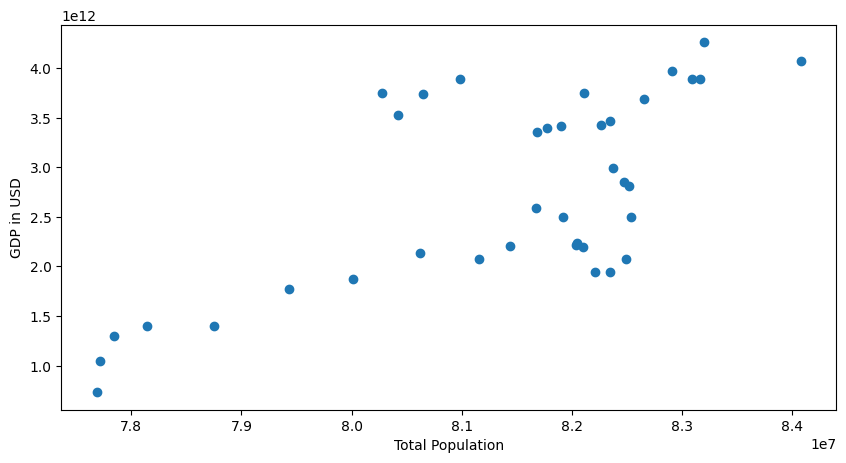

In [52]:
# Plot GDP of Germany with feature total population
# YOUR CODE HERE (OPTION)
germany_df = cleaned_df[cleaned_df['Country'] == 'Germany']
plt.figure(figsize=(10, 5))
plt.scatter(germany_df['Total Population'], germany_df['GDP in USD'])
plt.xlabel('Total Population')
plt.ylabel('GDP in USD')
plt.show()

## Feature engineering

In [53]:
# YOUR CODE HERE (OPTION) 
X = germany_df['Total Population'].values.reshape(-1, 1)
y = germany_df['GDP in USD'].values.reshape(-1, 1)


## Training model

In [54]:
# YOUR CODE HERE (OPTION) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluation

In [55]:
# YOUR CODE HERE (OPTION) 
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.818944537925782e+23
R-squared: 0.8028387059498634


## Prediction

In [56]:
# YOUR CODE HERE (OPTION) 
# Predict for all data points
y_pred = model.predict(X)
print(f'When the total population of Germany is {X[0][0]}, the GDP is {y_pred[0][0]}')

When the total population of Germany is 84079811.0, the GDP is 3739185765833.0586


## Results analysis

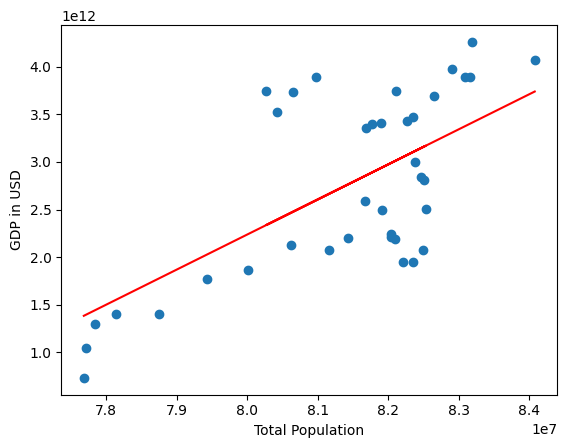

In [57]:
# YOUR CODE HERE (OPTION) 
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Total Population')
plt.ylabel('GDP in USD')
plt.show()

## Conclusion

**Your conclusion**

Overall, the model is able to predict the GDP of Germany with relatively high accuracy. The R-squared value of 0.80 suggests that the model explains about 80% of the variation in GDP, which is considered to be a good fit.

The model does have some limitations, however. The Mean Squared Error (MSE) is high, which means that there is a significant amount of error in the predictions. This may be due to the fact that the model is not able to capture all of the factors that influence GDP